In [1]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets

## The digits datas
digits = datasets.load_digits()
print(len(digits.images))

1797


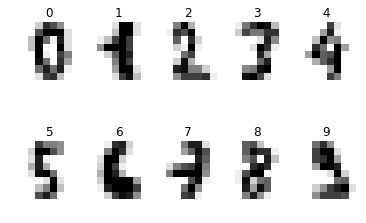

In [2]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i+20], cmap=plt.cm.gray_r,interpolation='nearest')
    plt.axis('off')
    plt.title(digits.target[i+20])
    #print(digits.target[i])
plt.show()

In [21]:
noofSamples = len(digits.images)
X = digits.images.reshape(noofSamples, -1)

# print(digits.images[1])
print(X[1])
print(X.shape)

Y = digits.target

[  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.   0.
   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.  16.   2.
   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.   1.  16.  16.
   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.   0.   0.   0.  11.
  16.  10.   0.   0.]
(1797, 64)


In [23]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print(len(X_train))
print(len(X_validation))

DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
predictions = DT.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1437
360
0.858333333333
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 36  1  1  1  0  0  0  1  2]
 [ 0  2 33  1  0  0  0  0  3  1]
 [ 0  0  1 31  0  0  0  0  1  1]
 [ 0  1  0  0 35  0  0  1  0  0]
 [ 0  1  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  2  0 26  0  0  0]
 [ 0  0  0  1  4  1  0 25  0  2]
 [ 0  5  4  2  1  0  1  0 27  3]
 [ 0  1  0  1  1  2  0  0  0 27]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        43
          1       0.78      0.86      0.82        42
          2       0.85      0.82      0.84        40
          3       0.84      0.91      0.87        34
          4       0.78      0.95      0.85        37
          5       0.90      0.96      0.93        28
          6       0.96      0.93      0.95        28
          7       0.96      0.76      0.85        33
          8       0.84      0.63      0.72        43
          9       0.75      0.84      0.79        32

avg / total       0.86      0.86      0.86       360



In [26]:
# Cross Validation

seed = 7
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=20, random_state=seed)
cv_results = model_selection.cross_val_score(DT, X_train, Y_train, cv=kfold, scoring=scoring)
print(cv_results)
print(sum(cv_results)/20)


[ 0.90277778  0.84722222  0.91666667  0.91666667  0.91666667  0.90277778
  0.83333333  0.79166667  0.80555556  0.93055556  0.93055556  0.88888889
  0.80555556  0.84722222  0.90277778  0.91666667  0.84722222  0.8028169
  0.91549296  0.90140845]
0.876124804382
